# References
## Uchiyama et al. (2003b)
* Model simulations to study many aspects related to recurrent inhibition circuit of the feline medial gastrocnemius pool.
* Recurrent inhibitory effects were considered to be homogeneously distributed.
* Only global gain of recurrent inhibition was changed, configurating three scenarios: standard, weak (half the size of standard) and strong (twice the size of standard).

# Parameters adjusted
* None

# Considerations
* 

In [1]:
import sys
sys.path.insert(0, '..')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time
import glob

In [2]:
def ensambleFR(spikeInstant, unitNumber, transientPeriod, simDuration):
    units = list(OrderedDict.fromkeys(unitNumber))
    
    if len(units) == 0:
        return 0
    else:
        meanFR = []
        for unit in units:
            MNSpikeInstants = [y for x, y in enumerate(spikeInstant) if unitNumber[x]==unit]
            numberOfSpikes = len([x for x in MNSpikeInstants if x>transientPeriod])
            meanFR.append(numberOfSpikes/(simDuration*1e-3 - transientPeriod*1e-3))

    #     popSlice = [y for x, y in enumerate(meanFR) if x>100 and x<200]
    #     sliceFR = sum(popSlice)/(len(popSlice))
    #     FR = sum(meanFR)/len(meanFR)

    #     plt.figure()
    #     plt.plot(units, meanFR, 'o')
    #     plt.axhline(y=FR, color='r', linestyle='-')
    #     plt.axhline(y=sliceFR, color='k', linestyle='-')
    #     plt.show()

        return sum(meanFR)/len(units)

In [6]:
pps = range(20, 440, 30)
files=glob.glob("*.dat")
files.sort()
numberMN = 300
numberS = 75
numberFR = 75
numberFF = 150
numberRC = 600
tmin = 1000
simDuration = 2000

<IPython.core.display.Javascript object>


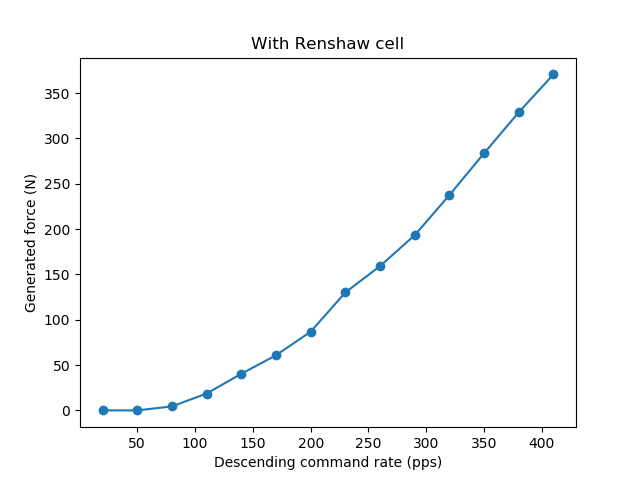

In [9]:
files=glob.glob("standard/*.dat")
files.sort()

forceOnTrials = []
for filename in files:
    force = []
    instant = []
    
    f = open(filename, 'r')
    lines = f.readlines()
    for line in lines:
        instant.append(float(line.split()[0]))
        force.append(float(line.split()[1]))
    f.close()
    
    staticForce = [y for x,y in enumerate(force) if instant[x]>tmin]
    forceOnTrials.append(np.mean(staticForce))

plt.figure()
plt.plot(pps, forceOnTrials, 'o-')
plt.title('With Renshaw cell')
plt.ylabel('Generated force (N)')
plt.xlabel('Descending command rate (pps)')
plt.show()

<IPython.core.display.Javascript object>


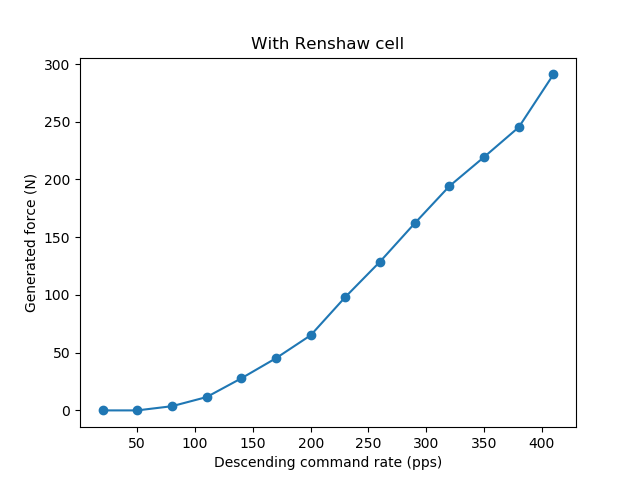

In [13]:
files=glob.glob("double/*.dat")
files.sort()

forceOnTriald = []
for filename in files:
    force = []
    instant = []
    
    f = open(filename, 'r')
    lines = f.readlines()
    for line in lines:
        instant.append(float(line.split()[0]))
        force.append(float(line.split()[1]))
    f.close()
    
    staticForce = [y for x,y in enumerate(force) if instant[x]>tmin]
    forceOnTriald.append(np.mean(staticForce))

plt.figure()
plt.plot(pps, forceOnTriald, 'o-')
plt.title('With Renshaw cell')
plt.ylabel('Generated force (N)')
plt.xlabel('Descending command rate (pps)')
plt.show()

<IPython.core.display.Javascript object>


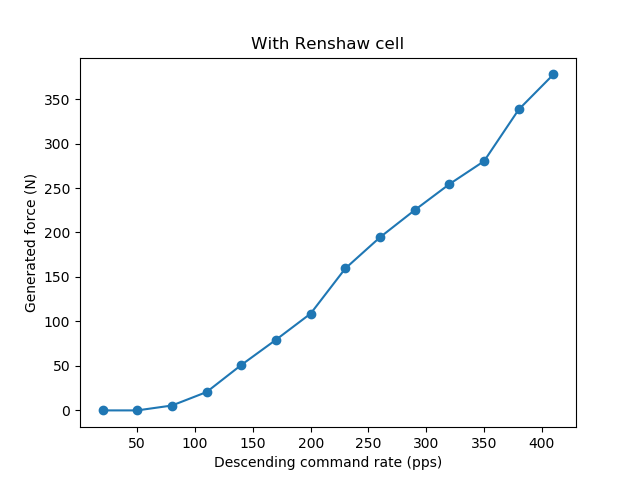

In [14]:
files=glob.glob("half/*.dat")
files.sort()

forceOnTrialh = []
for filename in files:
    force = []
    instant = []
    
    f = open(filename, 'r')
    lines = f.readlines()
    for line in lines:
        instant.append(float(line.split()[0]))
        force.append(float(line.split()[1]))
    f.close()
    
    staticForce = [y for x,y in enumerate(force) if instant[x]>tmin]
    forceOnTrialh.append(np.mean(staticForce))

plt.figure()
plt.plot(pps, forceOnTrialh, 'o-')
plt.title('With Renshaw cell')
plt.ylabel('Generated force (N)')
plt.xlabel('Descending command rate (pps)')
plt.show()

<IPython.core.display.Javascript object>


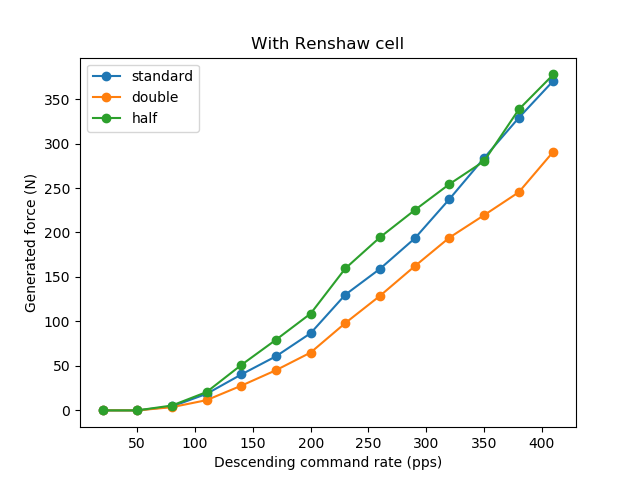

In [16]:
plt.figure()
plt.plot(pps, forceOnTrials, 'o-', label = 'standard')
plt.plot(pps, forceOnTriald, 'o-', label = 'double')
plt.plot(pps, forceOnTrialh, 'o-', label = 'half')
plt.legend()
plt.title('With Renshaw cell')
plt.ylabel('Generated force (N)')
plt.xlabel('Descending command rate (pps)')
plt.show()